### **Decision Tree Classifier (Customer Purchase Prediction)**

In [3]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

import pandas as pd
df = pd.concat([X, y], axis=1)
print(df.shape)
print(df.head())


(45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [7]:
X = df.drop('y', axis=1)
y = df['y']


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (36168, 16)
Testing data shape: (9043, 16)


In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)

model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8970474400088466

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7985
           1       0.59      0.40      0.47      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043


Confusion Matrix:
 [[7693  292]
 [ 639  419]]


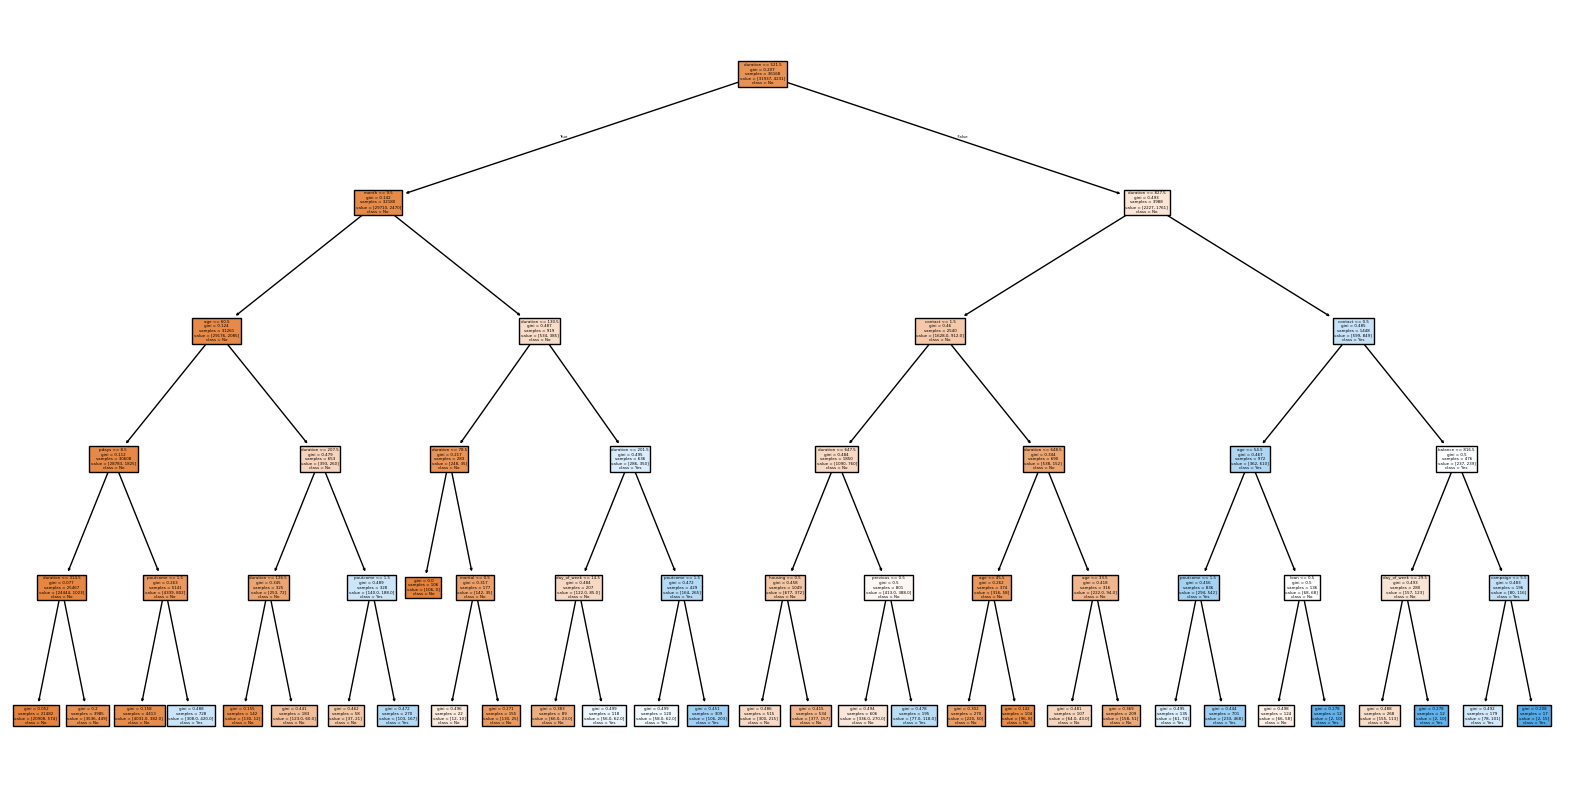

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=['No','Yes'])
plt.show()


In [13]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=['No','Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # saves as PDF/PNG
graph.view()


'decision_tree.pdf'

In [14]:
from google.colab import files
files.download("decision_tree.pdf")   # or .png if saved as image


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
graph.render("decision_tree")


'decision_tree.pdf'

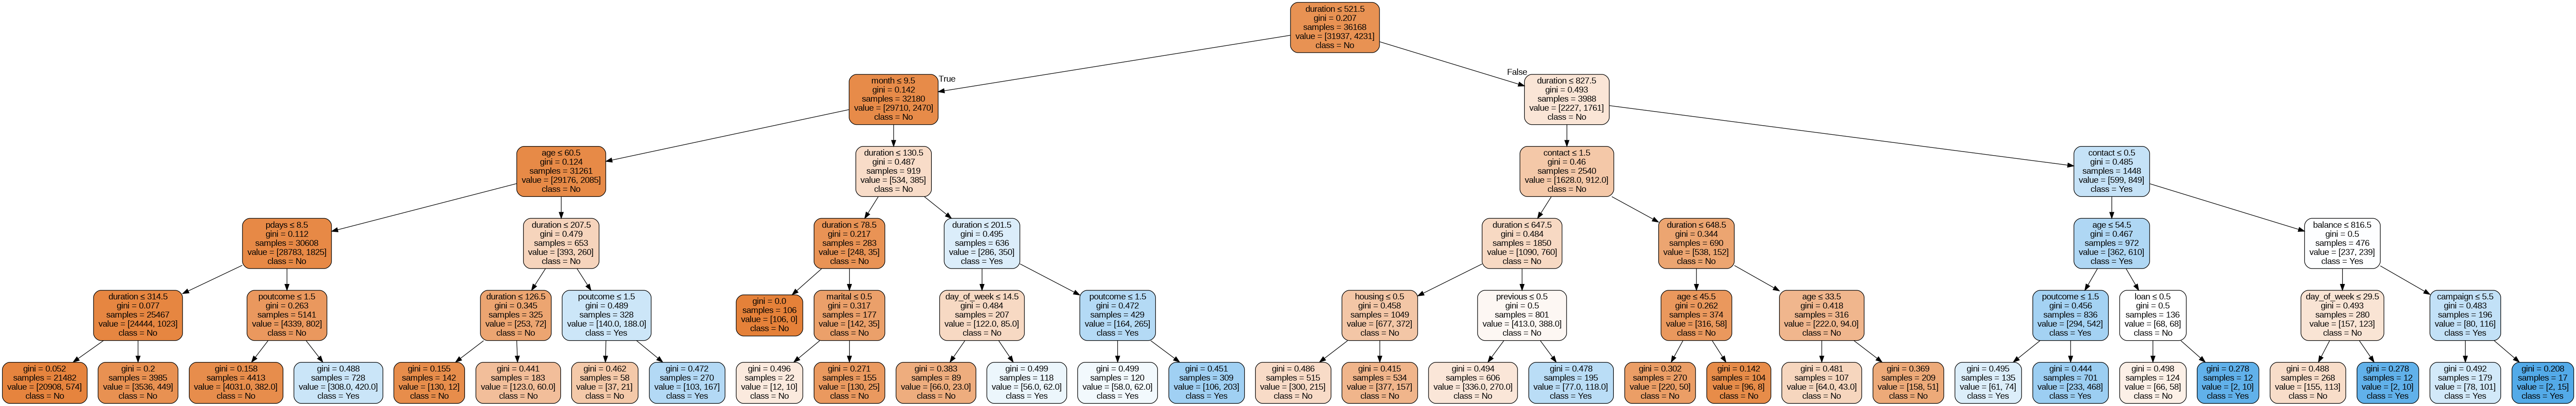

In [16]:
from IPython.display import Image

graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")
Image(filename="decision_tree.png")


## **Thank You**